In [1]:
import pandas as pd
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import re
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.decomposition import PCA
import pickle

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
with open("ccdf2.pkl", 'rb') as picklefile: 
    ccdf = pickle.load(picklefile)

In [3]:
with open("ccdf_upsampled.pkl", 'rb') as picklefile: 
    ccdf_up = pickle.load(picklefile)

In [4]:
with open("ccdf_downsampled.pkl", 'rb') as picklefile: 
    ccdf_down = pickle.load(picklefile)

In [5]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.3, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

In [7]:
X = ccdf.drop('default',1)
y = ccdf['default']

X_up = ccdf_up.drop('default',1)
y_up = ccdf_up['default']

X_down = ccdf_down.drop('default',1)
y_down = ccdf_down['default']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(X_up, y_up, test_size=0.4, random_state=42)

X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_down, y_down, test_size=0.4, random_state=42)

In [9]:
#Decision tree classifier
dtc = DecisionTreeClassifier()
fit = dtc.fit(X_train, y_train)
yhat = fit.predict(X_test)
dtc_score = fit.score(X_test, y_test)
print(dtc_score)

0.673324189954


Training Data Accuracy: 1.00
Test Data Accuracy:     0.67
[[5355 1508]
 [1349  537]]


Precision:              0.80
Recall:                 0.78


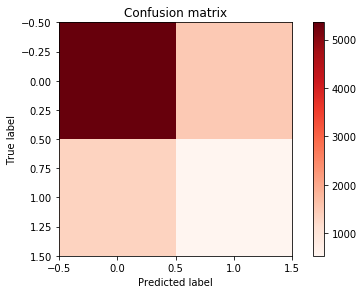

In [10]:
train_score(dtc,X,y)

In [11]:
#Decision tree classifier
dtc = DecisionTreeClassifier()
fit = dtc.fit(X_up_train, y_up_train)
yhat = fit.predict(X_up_test)
dtc_score = fit.score(X_up_test, y_up_test)
print(dtc_score)

0.821799116998


Training Data Accuracy: 1.00
Test Data Accuracy:     0.84
[[4986 1788]
 [ 418 6398]]


Precision:              0.92
Recall:                 0.74


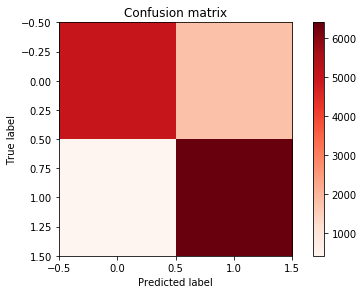

In [12]:
train_score(dtc,X_up,y_up)

In [13]:
#Decision tree classifier
dtc = DecisionTreeClassifier()
fit = dtc.fit(X_down_train, y_down_train)
yhat = fit.predict(X_down_test)
dtc_score = fit.score(X_down_test, y_down_test)
print(dtc_score)

0.548349961627


Training Data Accuracy: 1.00
Test Data Accuracy:     0.55
[[1056  896]
 [ 868 1089]]


Precision:              0.55
Recall:                 0.54


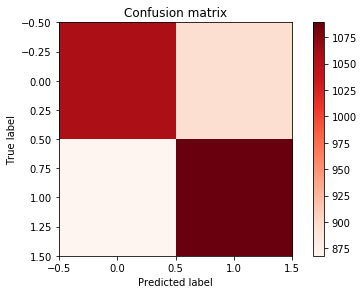

In [14]:
train_score(dtc,X_down,y_down)